## Preprocessing

In [1]:
import pandas as pd
import numpy as np
columns_file = 'census-bureau.columns'
data_file = 'census-bureau.data'
columns = pd.read_csv(columns_file, header=None).iloc[:, 0].tolist()
df = pd.read_csv(data_file, delimiter=',', header=None, names=columns)

In [2]:
na_values = ['?', 'NA', 'N/A', '', 'nan',' ', 'null', 'Null', 'NULL', 'NaN']
df = df.replace(na_values, np.nan)
df.isna().sum()[df.isna().sum() > 0]

hispanic origin                     874
state of previous residence         708
migration code-change in msa      99696
migration code-change in reg      99696
migration code-move within reg    99696
migration prev res in sunbelt     99696
country of birth father            6713
country of birth mother            6119
country of birth self              3393
dtype: int64

In [3]:
df.duplicated().sum()

3229

Dropping Duplicates

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df['income more than 50k'] = df['label'].apply(lambda x: 1 if '50000+' in x else 0)
df.drop('label', axis=1, inplace=True)

In [6]:
df.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,income more than 50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,0
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,0
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,0


In [7]:
df.describe()

,age,detailed industry recode,detailed occupation recode,wage per hour,capital gains,capital losses,dividends from stocks,weight,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,year,income more than 50k
count,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000,196294.000000
mean,34.929468,15.603187,11.490468,56.336505,441.870037,37.927593,200.722386,1743.267584,1.988105,0.178304,1.538183,23.553889,94.499328,0.063079
std,22.210001,18.106401,14.498128,277.054333,4735.677027,274.081174,2000.130616,996.945985,2.371018,0.557739,0.836813,24.428588,0.500001,0.243105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1061.530000,0.000000,0.000000,2.000000,0.000000,94.000000,0.000000
50%,34.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1620.175000,1.000000,0.000000,2.000000,12.000000,94.000000,0.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2194.060000,4.000000,0.000000,2.000000,52.000000,95.000000,0.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000,1.000000


## Data Exploration

In [8]:
numerical_columns = [
    'age',
    'wage per hour',
    'capital gains',
    'capital losses',
    'dividends from stocks',
    'weeks worked in year',
    'weight'
]
categorical_columns = [
    'class of worker',
    'detailed industry recode',
    'detailed occupation recode',
    'education',
    'enroll in edu inst last wk',
    'marital stat',
    'major industry code',
    'major occupation code',
    'race',
    'hispanic origin',
    'num persons worked for employer',
    'sex',
    'member of a labor union',
    'reason for unemployment',
    'full or part time employment stat',
    'tax filer stat',
    'region of previous residence',
    'state of previous residence',
    'detailed household and family stat',
    'detailed household summary in household',
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'live in this house 1 year ago',
    'migration prev res in sunbelt',
    'family members under 18',
    'country of birth father',
    'country of birth mother',
    'country of birth self',
    'citizenship',
    'own business or self employed',
    "fill inc questionnaire for veteran's admin",
    'veterans benefits',
    'year',
    'income more than 50k'
]
len(numerical_columns), len(categorical_columns)

(7, 35)

Feature Summarization Function

In [9]:
def summarize(df):
    numeric_stats = {}
    categorical_stats = {}
    for col in numerical_columns:
        s = df[col]
        numeric_stats[col] = {
            "Null Count": f'{s.isnull().sum()} ({(s.isnull().sum() / len(s)) * 100:.2f}%)',
            "NaN Count": f'{s.isna().sum()} ({(s.isna().sum() / len(s)) * 100:.2f}%)',
            "Unique Values": s.nunique(),
            "Min": s.min(),
            "Max": s.max(),
            "Mean": s.mean(),
            "Median": s.median(),
        }
    for col in categorical_columns:
        s = df[col] 

        nulls = s.isnull().sum()
        nans = s.isna().sum()
        uniques = s.nunique(dropna=True)
        
        empty_strings = (s == "").sum()

        most_freq = s.mode(dropna=True)[0] if not s.mode(dropna=True).empty else "N/A"
        freq_count = s.value_counts(dropna=True).iloc[0] if not s.value_counts(dropna=True).empty else "N/A"

        categorical_stats[col] = {
            "Null Count": f'{nulls} ({(nulls / len(s)) * 100:.2f}%)',
            "NaN Count": f'{nans} ({(nans / len(s)) * 100:.2f}%)',
            "Unique Values": uniques,
            "Most Frequent": most_freq,
            "Frequency Count": freq_count,
            "Empty String Count": empty_strings,
        }

    numeric_df = pd.DataFrame(numeric_stats).T
    categorical_df = pd.DataFrame(categorical_stats).T

    return numeric_df, categorical_df


In [10]:
num_cols_stats, cat_cols_stats = summarize(df)
num_cols_stats

,Null Count,NaN Count,Unique Values,Min,Max,Mean,Median
age,0 (0.00%),0 (0.00%),91,0,90,34.929468,34.0
wage per hour,0 (0.00%),0 (0.00%),1240,0,9999,56.336505,0.0
capital gains,0 (0.00%),0 (0.00%),132,0,99999,441.870037,0.0
capital losses,0 (0.00%),0 (0.00%),113,0,4608,37.927593,0.0
dividends from stocks,0 (0.00%),0 (0.00%),1478,0,99999,200.722386,0.0
weeks worked in year,0 (0.00%),0 (0.00%),53,0,52,23.553889,12.0
weight,0 (0.00%),0 (0.00%),99800,37.87,18656.3,1743.267584,1620.175


In [11]:
cat_cols_stats

,Null Count,NaN Count,Unique Values,Most Frequent,Frequency Count,Empty String Count
class of worker,0 (0.00%),0 (0.00%),9,Not in universe,97029,0
detailed industry recode,0 (0.00%),0 (0.00%),52,0,97467,0
detailed occupation recode,0 (0.00%),0 (0.00%),47,0,97467,0
education,0 (0.00%),0 (0.00%),17,High school graduate,48374,0
enroll in edu inst last wk,0 (0.00%),0 (0.00%),3,Not in universe,183762,0
marital stat,0 (0.00%),0 (0.00%),7,Married-civilian spouse present,84194,0
major industry code,0 (0.00%),0 (0.00%),24,Not in universe or children,97467,0
major occupation code,0 (0.00%),0 (0.00%),15,Not in universe,97467,0
race,0 (0.00%),0 (0.00%),5,White,164380,0
hispanic origin,870 (0.44%),870 (0.44%),9,All other,168803,0


Feature Visualization Functions

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

def plot_numeric_grid(df, numeric_cols, bins=50, log_scale=False):
    n = len(numeric_cols)
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        sns.histplot(df[col].values, bins=bins, kde=False, ax=ax)
        if log_scale:
            ax.set_yscale("log")
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel("Count")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_categorical_grid(df, cat_cols, top_n=15):
    n = len(cat_cols)
    cols = 3
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols):
        ax = axes[i]
        counts = df[col].value_counts(normalize=True).head(top_n)*100
        ax.bar(counts.index.astype(str), counts.values)
        ax.set_title(col)
        ax.set_ylabel("Percentage (%)")
        ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


<ipython-input-12-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-12-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-12-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-12-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-12-66a20b4df149>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(counts.index.astype(str), rotation=45, ha="right", fontsize=8)
<ipython-input-12-66a20b4

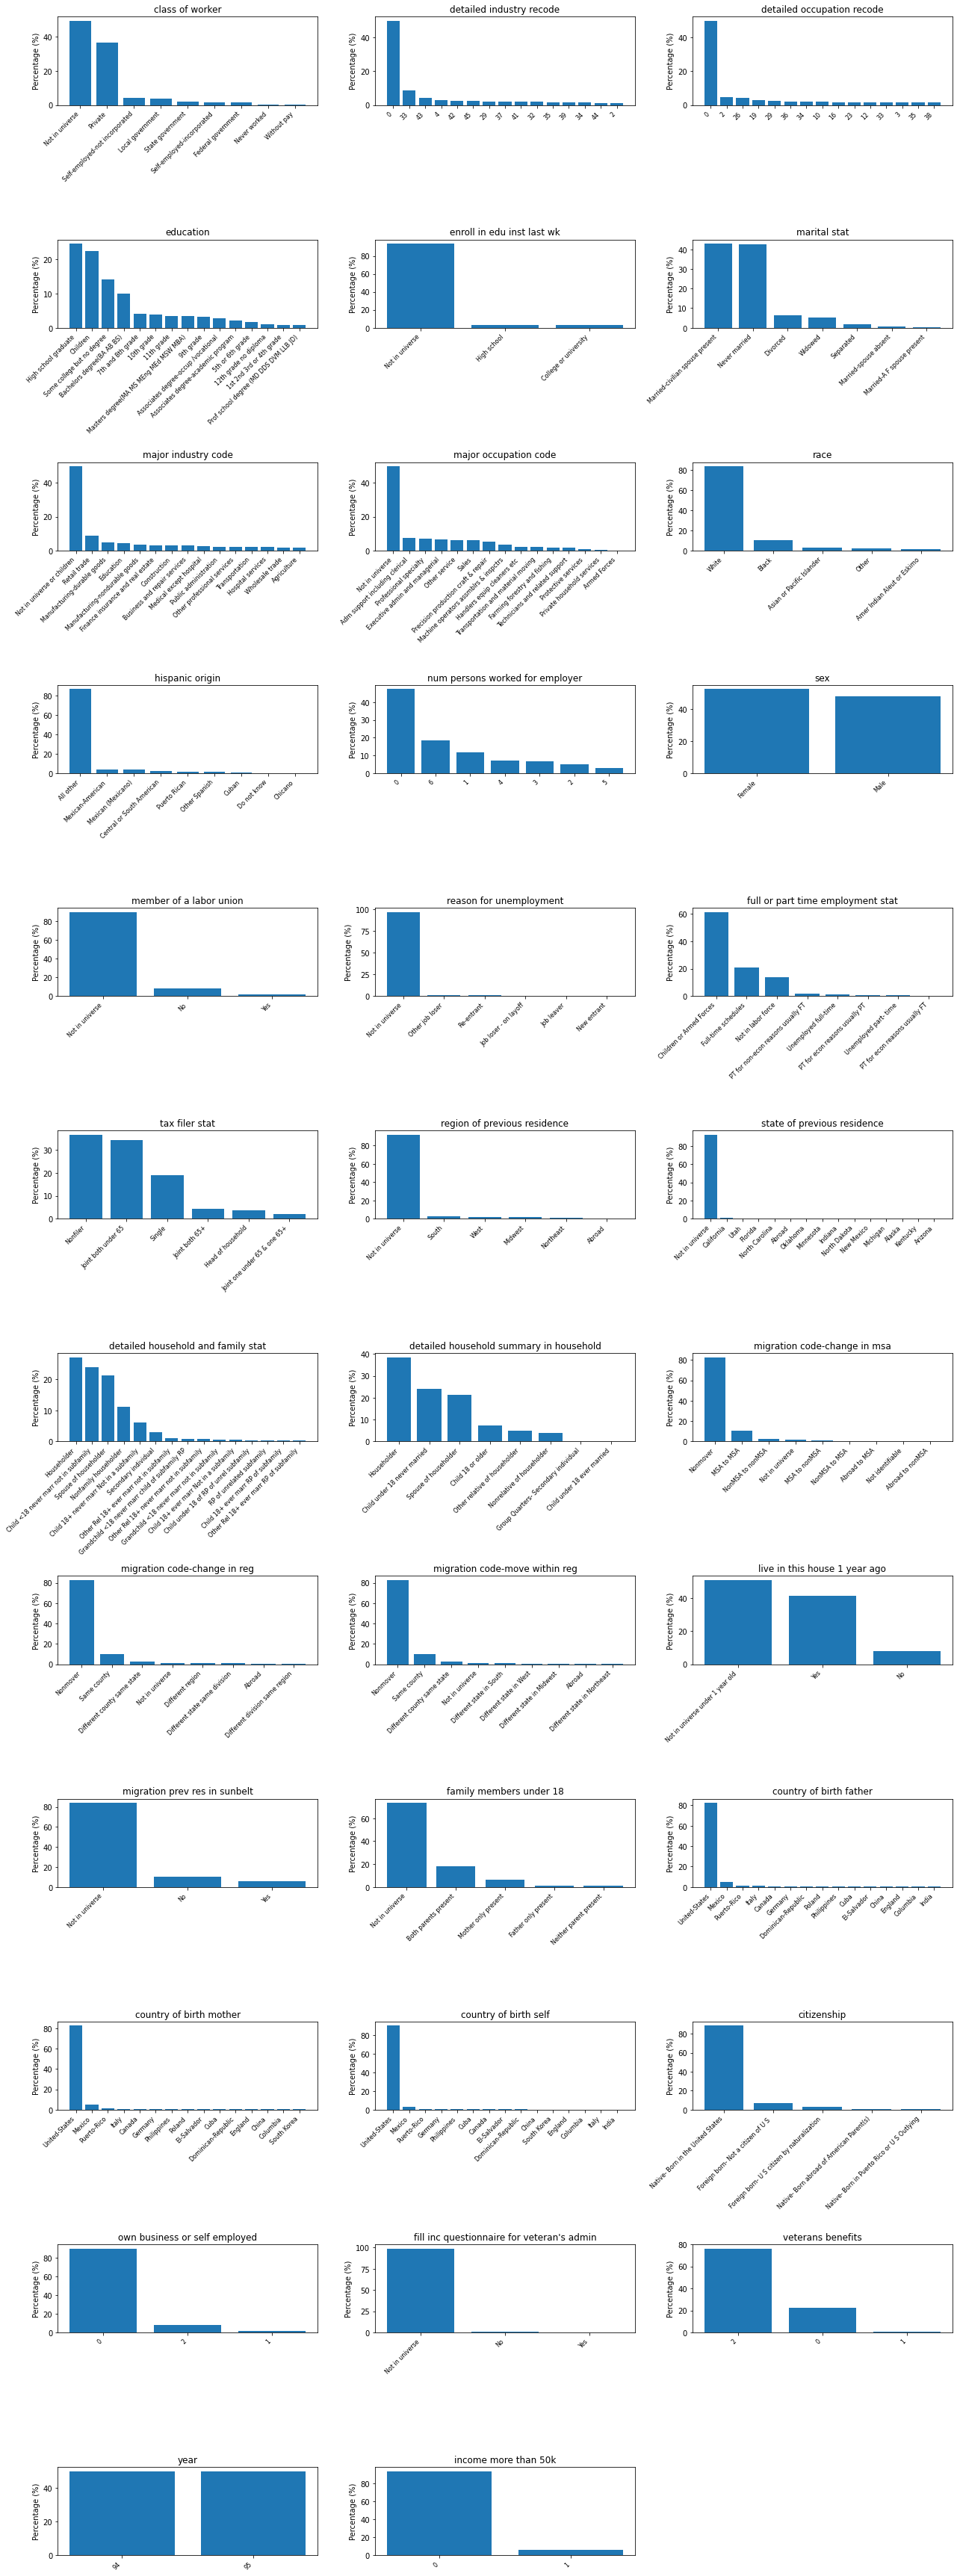

In [13]:
plot_categorical_grid(df,categorical_columns)

## Data Cleaning, Dropping, Merging and Feature Engineering

I will drop all the columns I dropped during income classification, with the exception of 


    'country of birth father'
    'country of birth mother'
    'country of birth self'
    'enroll in edu inst last wk'
    'detailed household and family stat'
    'major industry code'
    'live in this house 1 year ago'
    'family members under 18'

I am retaining these in order to retain more demographic signal to improve the user segmentation



In [14]:
cols_to_drop = [
    'migration code-change in msa',
    'migration code-change in reg',
    'migration code-move within reg',
    'migration prev res in sunbelt',
    'state of previous residence',
    'region of previous residence',
    'detailed industry recode',
    'detailed occupation recode',
    'member of a labor union',
    'reason for unemployment',
    'fill inc questionnaire for veteran\'s admin',
    'year',
    'veterans benefits',
    'detailed household summary in household'
]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], axis=1)
numerical_columns = [col for col in numerical_columns if col not in cols_to_drop]
categorical_columns = [col for col in categorical_columns if col not in cols_to_drop]

In [15]:
num_cols_stats, cat_cols_stats = summarize(df)
cat_cols_stats

,Null Count,NaN Count,Unique Values,Most Frequent,Frequency Count,Empty String Count
class of worker,0 (0.00%),0 (0.00%),9,Not in universe,97029,0
education,0 (0.00%),0 (0.00%),17,High school graduate,48374,0
enroll in edu inst last wk,0 (0.00%),0 (0.00%),3,Not in universe,183762,0
marital stat,0 (0.00%),0 (0.00%),7,Married-civilian spouse present,84194,0
major industry code,0 (0.00%),0 (0.00%),24,Not in universe or children,97467,0
major occupation code,0 (0.00%),0 (0.00%),15,Not in universe,97467,0
race,0 (0.00%),0 (0.00%),5,White,164380,0
hispanic origin,870 (0.44%),870 (0.44%),9,All other,168803,0
num persons worked for employer,0 (0.00%),0 (0.00%),7,0,92770,0
sex,0 (0.00%),0 (0.00%),2,Female,102400,0


In [16]:
df['hispanic origin'].value_counts()

hispanic origin
All other                    168803
Mexican-American               8008
Mexican (Mexicano)             7210
Central or South American      3891
Puerto Rican                   3306
Other Spanish                  2476
Cuban                          1122
Do not know                     305
Chicano                         303
Name: count, dtype: int64

Imputing the missing values with the mode 

In [17]:
df['hispanic origin'] = df['hispanic origin'].fillna('All other')

Merging categories to have just two: Hispanic and All other

<AxesSubplot:xlabel='hispanic origin'>

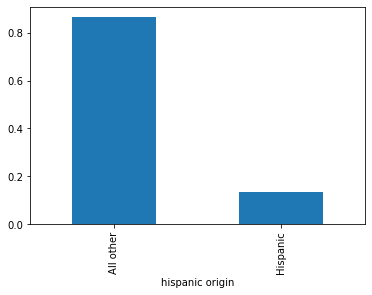

In [18]:
df['hispanic origin'] = df['hispanic origin'].replace([
    'Central or South American','Mexican (Mexicano)', 'Mexican-American', 'Other Spanish',
    'Puerto Rican', 'Cuban', 'Chicano'
], "Hispanic")
df['hispanic origin'] = df['hispanic origin'].replace({
    'Do not know': 'All other'
})
df['hispanic origin'].value_counts(normalize=True).plot(kind='bar')

The country of birth columns can be divided into the following major regions:
1. North America
2. Latin America
3. Europe
4. Asia
5. Middle East

In [19]:
country_cols = ['country of birth father', 'country of birth mother', 'country of birth self']
country_mapping = {
    #North America
    'United-States': 'North America',
    'Canada': 'North America',

    #Latin America
    'Mexico': 'Latin America',
    'Puerto-Rico': 'Latin America',
    'Cuba': 'Latin America',
    'Dominican-Republic': 'Latin America',
    'Jamaica': 'Latin America',
    'Honduras': 'Latin America',
    'El-Salvador': 'Latin America',
    'Guatemala': 'Latin America',
    'Colombia': 'Latin America',
    'Ecuador': 'Latin America',
    'Peru': 'Latin America',
    'Nicaragua': 'Latin America',
    'Trinadad&Tobago': 'Latin America',
    'Haiti': 'Latin America',
    'Panama': 'Latin America',

    #Europe
    'England': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Ireland': 'Europe',
    'Scotland': 'Europe',
    'Greece': 'Europe',
    'Yugoslavia': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe',

    #Asia 
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'Philippines': 'Asia',
    'Vietnam': 'Asia',
    'Korea': 'Asia',
    'Cambodia': 'Asia',
    'Laos': 'Asia',
    'Thailand': 'Asia',
    'Taiwan': 'Asia',
    'Hong-Kong': 'Asia',
    'South Korea': 'Asia',
    
    #Middle East
    'Iran': 'Middle East',
    'Israel': 'Middle East',
}

for col in country_cols:
    df[col] = df[col].map(country_mapping).fillna('Other')

<AxesSubplot:xlabel='tax filer stat'>

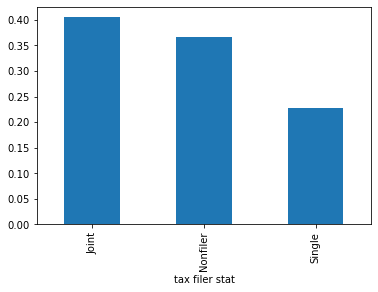

In [20]:
df['tax filer stat'] = df['tax filer stat'].replace([
    'Joint both 65+', 'Joint one under 65 & one 65+', 'Joint both under 65'
], 'Joint')
df['tax filer stat'] = df['tax filer stat'].replace({
    'Head of household': 'Single'
})
df['tax filer stat'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='class of worker'>

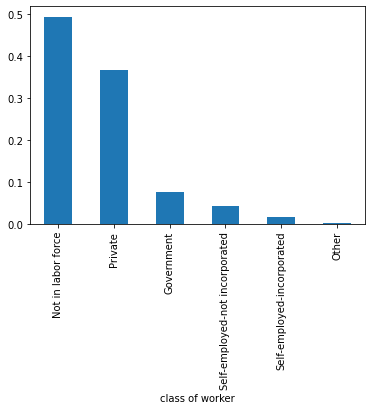

In [21]:

df['class of worker'] = df['class of worker'].replace({
    "Not in universe": "Not in labor force",
    "Federal government": "Government",
    "State government": "Government",
    "Local government": "Government",
    "Never worked": "Other",
    "Without pay": "Other",
})
df['class of worker'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='family members under 18'>

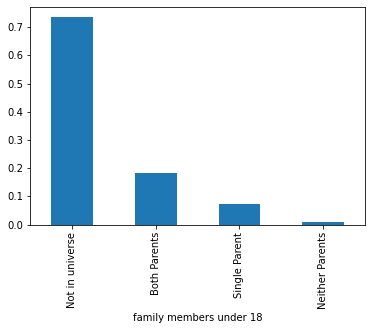

In [22]:
df['family members under 18'] = df['family members under 18'].replace({
    'Both parents present': 'Both Parents',
    'Neither parent present': 'Neither Parents',
    'Mother only present': 'Single Parent',
    'Father only present': 'Single Parent',
})
df['family members under 18'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='marital stat'>

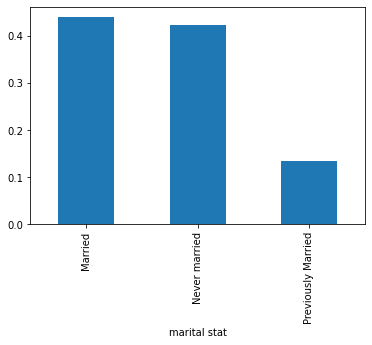

In [23]:
df['marital stat'] = df['marital stat'].replace([
     "Married-civilian spouse present",
    "Married-A F spouse present",
    "Married-spouse absent"], "Married")
df['marital stat'] = df['marital stat'].replace([
    "Divorced",
    "Separated",
    "Widowed"], "Previously Married")
df['marital stat'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='detailed household and family stat'>

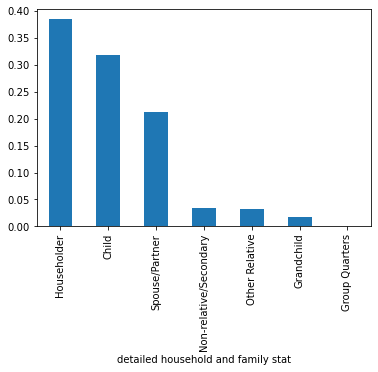

In [24]:

household_group_map = {
    # Householder
    'Householder': 'Householder',
    'Nonfamily householder': 'Householder',

    # Spouse/Partner
    'Spouse of householder': 'Spouse/Partner',
    'Spouse of RP of unrelated subfamily': 'Spouse/Partner',

    # Child
    'Child 18+ never marr Not in a subfamily': 'Child',
    'Child <18 never marr not in subfamily': 'Child',
    'Child 18+ ever marr Not in a subfamily': 'Child',
    'Child 18+ never marr RP of subfamily': 'Child',
    'Child 18+ spouse of subfamily RP': 'Child',
    'Child under 18 of RP of unrel subfamily': 'Child',
    'Child 18+ ever marr RP of subfamily': 'Child',
    'Child <18 never marr RP of subfamily': 'Child',
    'Child <18 ever marr not in subfamily': 'Child',
    'Child <18 spouse of subfamily RP': 'Child',
    'Child <18 ever marr RP of subfamily': 'Child',
    
    # Grandchild   
    'Grandchild <18 never marr not in subfamily': 'Grandchild',
    'Grandchild <18 never marr child of subfamily RP': 'Grandchild',
    'Grandchild 18+ never marr not in subfamily': 'Grandchild',
    'Grandchild 18+ spouse of subfamily RP': 'Grandchild',
    'Grandchild 18+ ever marr not in subfamily': 'Grandchild',
    'Grandchild 18+ never marr RP of subfamily': 'Grandchild',
    'Grandchild 18+ ever marr RP of subfamily': 'Grandchild',
    'Grandchild <18 never marr RP of subfamily': 'Grandchild',
    'Grandchild <18 ever marr not in subfamily': 'Grandchild',
    
    # Other Relative
    'Other Rel 18+ ever marr not in subfamily': 'Other Relative',
    'Other Rel 18+ never marr not in subfamily': 'Other Relative',
    'Other Rel <18 never marr child of subfamily RP': 'Other Relative',
    'Other Rel 18+ ever marr RP of subfamily': 'Other Relative',
    'Other Rel 18+ spouse of subfamily RP': 'Other Relative',
    'Other Rel <18 never marr not in subfamily': 'Other Relative',
    'Other Rel <18 spouse of subfamily RP': 'Other Relative',
    'Other Rel 18+ never marr RP of subfamily': 'Other Relative',
    'Other Rel <18 ever marr RP of subfamily': 'Other Relative',
    'Other Rel <18 never married RP of subfamily': 'Other Relative',
    'Other Rel <18 ever marr not in subfamily': 'Other Relative',
    
    # Non-relative/Secondary
    'Secondary individual': 'Non-relative/Secondary',
     'RP of unrelated subfamily': 'Non-relative/Secondary',

    # Group quarters
     'In group quarters': 'Group Quarters'
}
df['detailed household and family stat'] = (
    df['detailed household and family stat']
    .map(household_group_map)
    .fillna('Other')
)

df['detailed household and family stat'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='citizenship'>

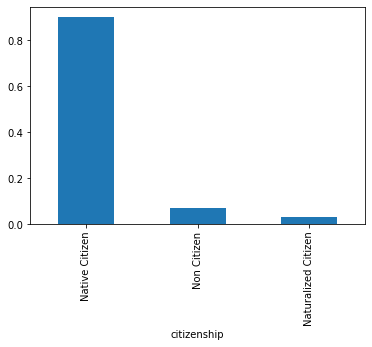

In [25]:
df['citizenship'] = df['citizenship'].replace([
    'Native- Born abroad of American Parent(s)','Native- Born in Puerto Rico or U S Outlying', 'Native- Born in the United States'
       ], 'Native Citizen')
df['citizenship'] = df['citizenship'].replace({
    'Foreign born- Not a citizen of U S ': 'Non Citizen',
    'Foreign born- U S citizen by naturalization': 'Naturalized Citizen'
})
df['citizenship'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='full or part time employment stat'>

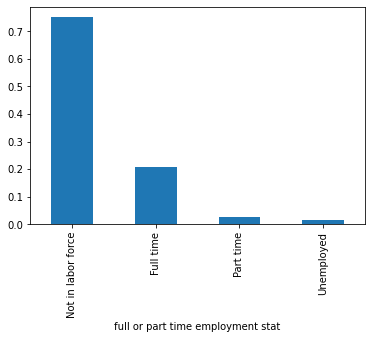

In [26]:
df['full or part time employment stat'] = df['full or part time employment stat'].replace([
    'Unemployed full-time','Unemployed part- time'
], 'Unemployed')
df['full or part time employment stat'] = df['full or part time employment stat'].replace([
    'PT for non-econ reasons usually FT', 'PT for econ reasons usually PT', 'PT for econ reasons usually FT'
], 'Part time')
df['full or part time employment stat'] = df['full or part time employment stat'].replace({
    'Children or Armed Forces': 'Not in labor force',
    'Full-time schedules': 'Full time'
})
df['full or part time employment stat'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='education'>

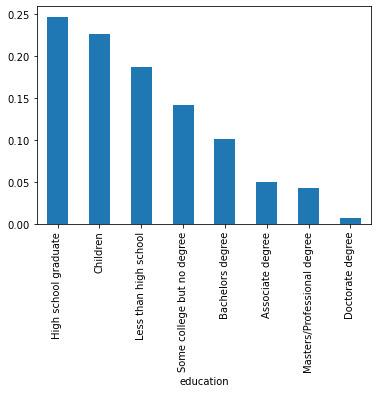

In [27]:
df['education'] = df['education'].replace([
    "Less than 1st grade",
    "1st 2nd 3rd or 4th grade",
    "5th or 6th grade",
    "7th and 8th grade",
    "9th grade",
    "10th grade",
    "11th grade",
    "12th grade no diploma",
], "Less than high school")
df['education'] = df['education'].replace([
    'Associates degree-occup /vocational',
    'Associates degree-academic program'
], "Associate degree")
df['education'] = df['education'].replace({
    'Bachelors degree(BA AB BS)': 'Bachelors degree',
    'Masters degree(MA MS MEng MEd MSW MBA)': 'Masters/Professional degree',
    'Prof school degree (MD DDS DVM LLB JD)': 'Masters/Professional degree',
    'Doctorate degree(PhD EdD)': 'Doctorate degree',
})

#Ordinal ranking for education levels
education_order = [
    'Children',
    'Less than high school',
    'High school graduate',
    'Some college but no degree',
    'Associate degree',
    'Bachelors degree',
    'Masters/Professional degree',
    'Doctorate degree'
]
df['education'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='major industry code'>

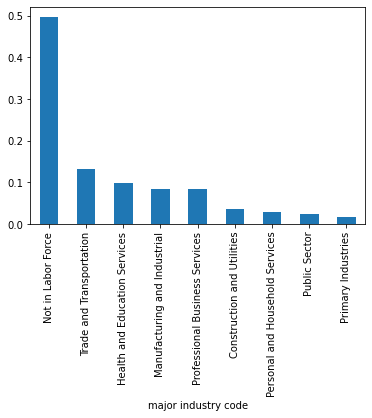

In [28]:
df['major industry code'] = df['major industry code'].replace({
    # Professional & business services
    "Finance insurance and real estate": "Professional Business Services",
    "Other professional services": "Professional Business Services",
    "Business and repair services": "Professional Business Services",

    # Health & education services
    "Medical except hospital": "Health and Education Services",
    "Hospital services": "Health and Education Services",
    "Education": "Health and Education Services",
    "Social services": "Health and Education Services",

    # Manufacturing & industrial production
    "Manufacturing-durable goods": "Manufacturing and Industrial",
    "Manufacturing-nondurable goods": "Manufacturing and Industrial",
    "Mining": "Manufacturing and Industrial",

    # Construction & utilities
    "Construction": "Construction and Utilities",
    "Utilities and sanitary services": "Construction and Utilities",

    # Trade & transportation
    "Wholesale trade": "Trade and Transportation",
    "Retail trade": "Trade and Transportation",
    "Transportation": "Trade and Transportation",
    "Communications": "Trade and Transportation",

    # Public sector & defense
    "Public administration": "Public Sector",
    "Armed Forces": "Public Sector",

    # Personal & household services
    "Personal services except private HH": "Personal and Household Services",
    "Private household services": "Personal and Household Services",
    "Entertainment": "Personal and Household Services",

    # Primary industries
    "Agriculture": "Primary Industries",
    "Forestry and fisheries": "Primary Industries",

    # Not in labor force
    "Not in universe or children": "Not in Labor Force"
})
df['major industry code'].value_counts(normalize=True).plot(kind='bar')

<AxesSubplot:xlabel='major occupation code'>

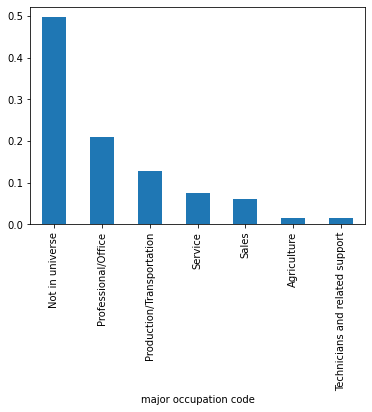

In [29]:
df['major occupation code'] = df['major occupation code'].replace([
    "Adm support including clerical",
    "Executive admin and managerial",
    "Professional specialty"
],"Professional/Office")

df['major occupation code'] = df['major occupation code'].replace([
    "Precision production craft & repair",
    "Machine operators assmblrs & inspctrs",
    "Transportation and material moving",
    "Handlers equip cleaners etc ",
],"Production/Transportation")

df['major occupation code'] = df['major occupation code'].replace([
    "Other service",
    "Private household services",
    "Protective services",
    "Armed Forces"
],"Service")

df['major occupation code'] = df['major occupation code'].replace({
    "Farming forestry and fishing": "Agriculture"
})

df['major occupation code'].value_counts(normalize=True).plot(kind='bar')

In [30]:
#Assuming 40 hour work weeks
df['annualized_wage'] = df['wage per hour'] * df['weeks worked in year'] * 40
numerical_columns.append('annualized_wage')
df['net capital income'] =  df['capital gains'] - df['capital losses'] + df['dividends from stocks']
numerical_columns.append('net capital income')
df["age_group"] = pd.cut(df["age"], bins=[0,18,26,36,51,66,100],
                        labels=['Child (<18)', 'Young Adult (18-25)', 'Early Career (26-35)', 'Mid Career (36-50)', 'Late Career (51-65)', 'Senior (65+)'], right=False, include_lowest=True)

I'll drop the investing columns, wage per hour and weeks worked in year since they have been replaced with net capital income and annualized wage. I am also dropping income more than 50k as it is highly skewed and I do not want it to dominate the clustering. I will be using the income more than 50k feature in the analysis later. 

In [31]:
cols_to_drop = ['capital gains', 'capital losses', 'dividends from stocks', 'wage per hour', 'weeks worked in year', 'income more than 50k']
df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
numerical_columns = [col for col in numerical_columns if col not in cols_to_drop]
categorical_columns = [col for col in categorical_columns if col not in cols_to_drop]
categorical_columns += ['age_group']

In [32]:
ordinal_columns = ['education']
df.drop('weight', axis=1, inplace=True, errors='ignore')
if 'education' in  categorical_columns:
    categorical_columns.remove('education')
if 'weight' in numerical_columns:
    numerical_columns.remove('weight')


In [33]:
print(f"Categorical ({len(categorical_columns)} columns): ",categorical_columns)
print(f"Numeric ({len(numerical_columns)} columns): ", numerical_columns)
print(f"Ordinal ({len(ordinal_columns)} columns): ", ordinal_columns)
print(f"Full DF ({len(df.columns)} columns): ")
print(df.columns)

Categorical (20 columns):  ['class of worker', 'enroll in edu inst last wk', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'num persons worked for employer', 'sex', 'full or part time employment stat', 'tax filer stat', 'detailed household and family stat', 'live in this house 1 year ago', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'own business or self employed', 'age_group']
Numeric (3 columns):  ['age', 'annualized_wage', 'net capital income']
Ordinal (1 columns):  ['education']
Full DF (24 columns): 
Index(['age', 'class of worker', 'education', 'enroll in edu inst last wk',
       'marital stat', 'major industry code', 'major occupation code', 'race',
       'hispanic origin', 'sex', 'full or part time employment stat',
       'tax filer stat', 'detailed household and family stat',
       'live in this house 1 year ago', 'num persons worked for employer',
    

## Scaling and Encoding

In [34]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np

numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
)

ordinal_transformer = Pipeline(
    steps=[('ordinal', OrdinalEncoder(categories=[education_order]))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ]
)
X = preprocessor.fit_transform(df)

## Cluster Analysis Function

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_numerical_comparison_bar_grid(df, columns, n_cols=3):
    """
    Generates bar plots (mean by cluster) for numerical features in a grid.
    """

    mean_df = df.groupby('cluster')[columns].mean().reset_index()
    mean_long = mean_df.melt(
        id_vars='cluster',
        var_name="Feature",
        value_name="Mean Value"
    )

    n_features = len(columns)
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(5 * n_cols, 4 * n_rows),
        squeeze=False
    )

    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]

        sns.barplot(
            x='cluster',
            y="Mean Value",
            data=mean_long[mean_long["Feature"] == col],
            ax=ax
        )

        ax.set_title(f"Mean {col}", fontsize=11, fontweight="bold")
        ax.set_xlabel("Cluster")
        ax.set_ylabel("Mean")
        ax.grid(axis="y", linestyle="--", alpha=0.3)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


def plot_categorical_comparison_grid(df, columns, n_cols=3):
    """
    Generates grouped bar plots (percentage by cluster) for categorical features in a grid.
    """

    n_features = len(columns)
    n_rows = math.ceil(n_features / n_cols)

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(6 * n_cols, 4.5 * n_rows),
        squeeze=False
    )

    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]

        category_counts = (
            df.groupby('cluster')[col]
              .value_counts(normalize=True)
              .mul(100)
              .rename("percent")
              .reset_index()
        )

        sns.barplot(
            x='cluster',
            y="percent",
            hue=col,
            data=category_counts,
            ax=ax,
            palette="tab20",
        )

        ax.set_title(col, fontsize=11, fontweight="bold")
        ax.set_ylabel("Percentage within Cluster")
        ax.set_xlabel("Cluster")

        ax.legend(
            title=col,
            fontsize=8,
            title_fontsize=9,
            loc="upper left"
        )

        ax.grid(axis="y", linestyle="--", alpha=0.3)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


def generate_cluster_summary_dfs(df, NUMERICAL_ANALYSIS_COLS, CATEGORICAL_ANALYSIS_COLS):
    """
    Generates cluster summary statistics as DataFrames.
    Returns a dictionary of DataFrames.
    """
    summary = {}

    #Cluster Size
    cluster_sizes = (df['cluster'].value_counts().sort_index().rename("count").to_frame())
    cluster_sizes["percentage"] = cluster_sizes["count"] / len(df) * 100
    summary["cluster_distribution"] = cluster_sizes

    #Numerical
    numerical_summary = (df.groupby('cluster')[NUMERICAL_ANALYSIS_COLS].mean().round(3))
    summary["numerical"] = numerical_summary

    # Categorical 
    cat_rows = []

    for col in CATEGORICAL_ANALYSIS_COLS:
        for cluster in sorted(df['cluster'].unique()):
            cluster_data = df.loc[df['cluster'] == cluster, col]
            if cluster_data.mode().empty:
                mode_value = "N/A"
                mode_pct = 0.0
            else:
                mode_value = cluster_data.mode().iloc[0]
                mode_pct = (cluster_data == mode_value).mean() * 100

            cat_rows.append({
                "feature": col,
                "cluster": cluster,
                "dominant_category": mode_value,
                "dominant_pct": round(mode_pct, 1)
            })

    categorical_summary = pd.DataFrame(cat_rows)

    # Pivot dominant category
    categorical_modes_flat = (
    categorical_summary
        .assign(
            value=lambda x:
                x["dominant_category"].astype(str)
                + " ("
                + x["dominant_pct"].round(1).astype(str)
                + "%)"
        )
        .pivot(
            index="feature",
            columns="cluster",
            values="value"
        )
    )
    summary["categorical"] = categorical_modes_flat
    return summary


def run_complete_analysis(
    df
):
    cols_to_drop = ['capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer', 'race','country of birth father', 'country of birth mother',
                    'live in this house 1 year ago', 'hispanic origin', 'family members under 18']
    NUMERICAL_ANALYSIS_COLS = numerical_columns
    CATEGORICAL_ANALYSIS_COLS = list(set(categorical_columns+ ordinal_columns))
    NUMERICAL_ANALYSIS_COLS = [col for col in NUMERICAL_ANALYSIS_COLS if (col not in cols_to_drop) and (col in df)]
    CATEGORICAL_ANALYSIS_COLS = [col for col in CATEGORICAL_ANALYSIS_COLS if col not in cols_to_drop and (col in df)]

    
    summary = generate_cluster_summary_dfs(df, NUMERICAL_ANALYSIS_COLS, CATEGORICAL_ANALYSIS_COLS)
    if NUMERICAL_ANALYSIS_COLS:
        plot_numerical_comparison_bar_grid(
            df,
            NUMERICAL_ANALYSIS_COLS
        )
    plot_categorical_comparison_grid(
        df,
        CATEGORICAL_ANALYSIS_COLS
    )
    return summary



## Mini Batch KMeans

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
Ks = range(3, 8)
results = []

for k in tqdm(Ks):
    km = MiniBatchKMeans(
        n_clusters=k,
        batch_size=4096,
        n_init=20,
        max_iter=300,
        random_state=42
    ).fit(X)
    labels = km.labels_
    inertia = km.inertia_
    silhouette = silhouette_score(X, labels,sample_size = 40000, random_state = 42)
    results.append({
        "K": k,
        "Inertia": inertia,
        "Silhouette Score": silhouette,
    })

results_df = pd.DataFrame(results)

100%|██████████| 5/5 [01:13<00:00, 14.60s/it]


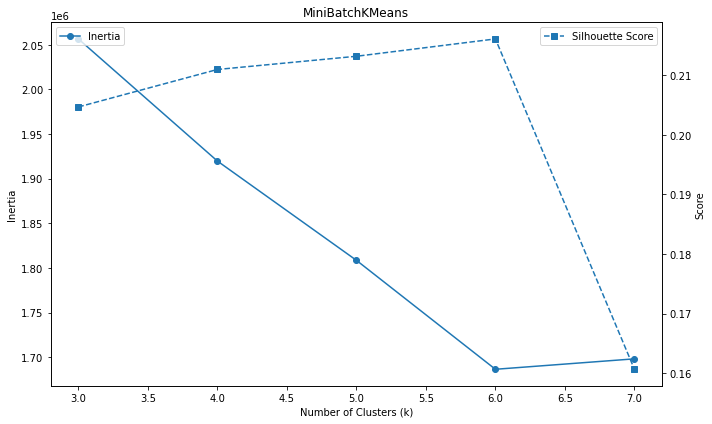

In [37]:
import matplotlib.pyplot as plt
import numpy as np

k = results_df["K"].to_numpy()
inertia = results_df["Inertia"].to_numpy()
sil = results_df["Silhouette Score"].to_numpy()


fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# Inertia (left axis)
ax1.plot(k, inertia, "o-")
ax1.set_xlabel("Number of Clusters (k)")
ax1.set_ylabel("Inertia")

# Silhouette (right axis)
ax2.plot(k, sil, "s--")
ax2.set_ylabel("Score")

# Legend (manual)
ax1.legend(["Inertia"], loc="upper left")
ax2.legend(["Silhouette Score"], loc="upper right")

plt.title("MiniBatchKMeans")
plt.tight_layout()
plt.show()

Looking at this plot:
1. Inertia keeps decreasing until k=6, after which there is a slight increase. 
2. Silhouette score keeps increasing until k=6, after which it takes a steep drop. 

Hence, Choice of k = 6

## Cluster Exploration

In [38]:
from sklearn.cluster import MiniBatchKMeans
final_kmeans = MiniBatchKMeans(
    n_clusters=6,
    batch_size=4096,
    n_init=30,
    random_state=42
)
df['cluster'] = final_kmeans.fit_predict(X)+1

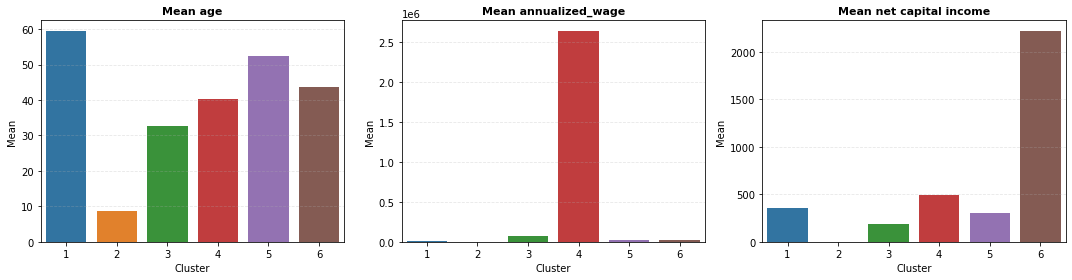

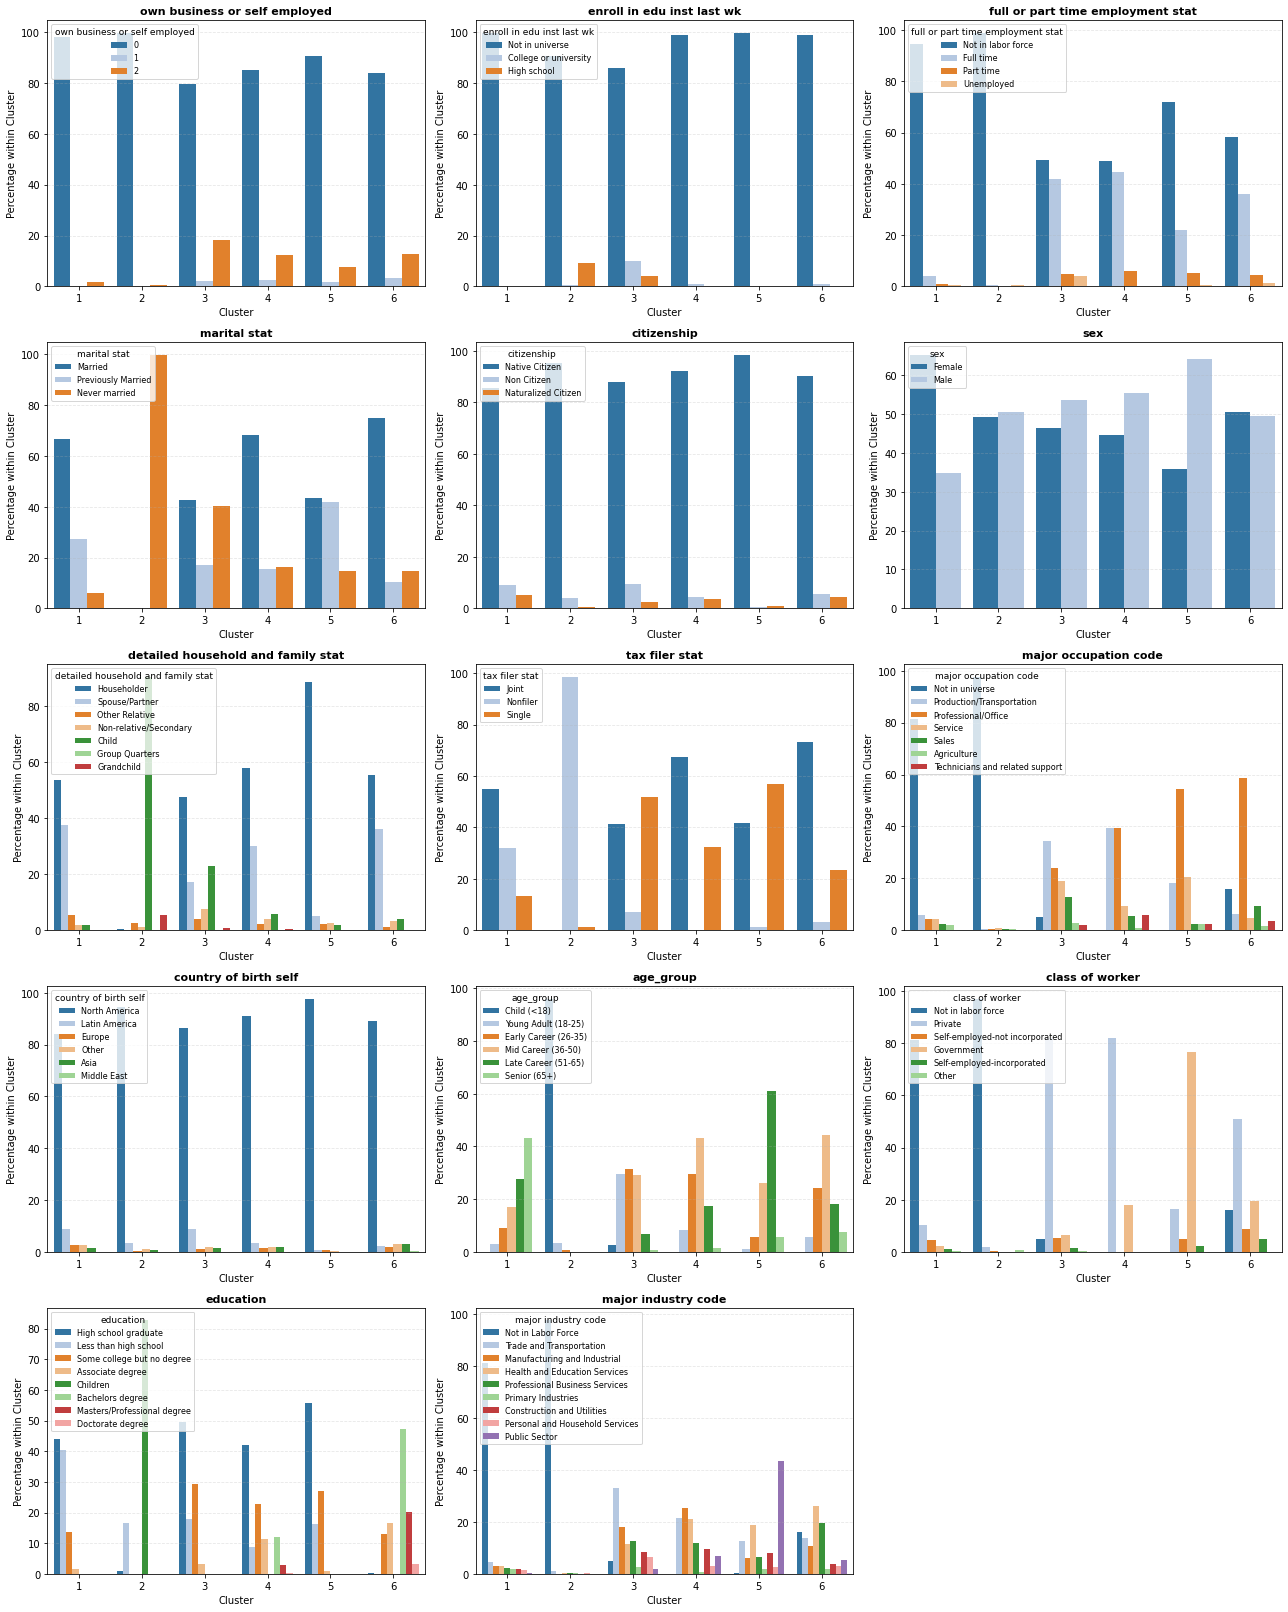

In [40]:
summary = run_complete_analysis(df)

In [41]:
summary['categorical']

cluster,1,2,3,4,5,6
feature,,,,,,
age_group,Senior (65+) (43.1%),Child (<18) (96.1%),Early Career (26-35) (31.5%),Mid Career (36-50) (43.2%),Late Career (51-65) (61.2%),Mid Career (36-50) (44.2%)
citizenship,Native Citizen (85.7%),Native Citizen (95.4%),Native Citizen (88.1%),Native Citizen (92.1%),Native Citizen (98.5%),Native Citizen (90.1%)
class of worker,Not in labor force (81.2%),Not in labor force (97.1%),Private (82.0%),Private (82.1%),Government (76.6%),Private (50.8%)
country of birth self,North America (84.1%),North America (94.3%),North America (86.4%),North America (91.0%),North America (97.8%),North America (89.2%)
detailed household and family stat,Householder (53.6%),Child (90.4%),Householder (47.4%),Householder (57.8%),Householder (88.4%),Householder (55.4%)
education,High school graduate (44.1%),Children (82.7%),High school graduate (49.6%),High school graduate (42.0%),High school graduate (55.7%),Bachelors degree (47.2%)
enroll in edu inst last wk,Not in universe (99.6%),Not in universe (90.5%),Not in universe (86.2%),Not in universe (98.8%),Not in universe (99.7%),Not in universe (99.0%)
full or part time employment stat,Not in labor force (94.4%),Not in labor force (98.8%),Not in labor force (49.1%),Not in labor force (48.9%),Not in labor force (72.0%),Not in labor force (58.1%)
major industry code,Not in Labor Force (81.4%),Not in Labor Force (97.7%),Trade and Transportation (33.0%),Manufacturing and Industrial (25.5%),Public Sector (43.6%),Health and Education Services (26.0%)


In [42]:
summary['numerical']

,age,annualized_wage,net capital income
cluster,,,
1,59.481,6003.997,354.052
2,8.753,528.499,0.900
3,32.671,71353.615,187.377
4,40.167,2643241.296,495.694
5,52.362,23416.394,304.272
6,43.622,17644.994,2218.720


In [56]:
summary['cluster_distribution']

,count,percentage
cluster,,
1,44468,22.653774
2,53628,27.320244
3,49311,25.120992
4,6110,3.112678
5,2235,1.138598
6,40542,20.653713


Given the high values in `annualized_wage`, it seems the assumption of 40 hour work weeks does not hold true. Cluster 3, for example, has mean annualized wages of $71,353, yet only 3.9% of individuals in this cluster have income exceeding $50k. Similarly, Cluster 4 displays a mean wage of $264,241 while only 7.9% earn over $50k. This suggests potential data quality issues or the presence of extreme outliers that skew the mean.

**Therefore, for the remainder of this analysis, we will rely on:**
1. **`income_more_than_50k`** - A binary indicator providing a clearer threshold for economic classification
2. **`net capital income`** - Captures wealth from investments, property, and other non-wage sources

These two variables provide a more consistent and interpretable picture of the economic standing of each cluster. We will still look at the plot for rough comparison with other clusters, but not absolute values by themselves. 

In [43]:
def top3_by_cluster(
    df,
    column,
    top_n=3,
    sep=" | ",
    round_pct=1
):
    """
    Returns a DataFrame with top N categories per cluster for a given column,
    formatted as: Category (xx.x%)
    """
    pd.set_option("display.max_colwidth", None)
    # Count categories per cluster
    counts = (
        df.groupby('cluster')[column]
          .value_counts(dropna=False)
          .rename("count")
          .reset_index()
    )

    # Cluster sizes
    totals = (
        df['cluster']
        .value_counts()
        .rename("total")
        .reset_index()
        .rename(columns={"index": 'cluster'})
    )

    counts = counts.merge(totals, on='cluster', how="left")
    counts["pct"] = (counts["count"] / counts["total"]) * 100

    # Top N categories per cluster
    topn = (
        counts.sort_values(['cluster', "count"], ascending=[True, False])
              .groupby('cluster')
              .head(top_n)
    )

    # Format output
    topn["formatted"] = (
        topn[column].astype(str)
        + " ("
        + topn["pct"].round(round_pct).astype(str)
        + "%)"
    )

    # Merge into single row per cluster
    result = (
        topn.groupby('cluster')["formatted"]
            .apply(lambda x: sep.join(x))
            .reset_index()
            .rename(columns={"formatted": f"{column.capitalize()}"})
    )

    return result



In [44]:
df_original = pd.read_csv(data_file, delimiter=',', header=None, names=columns)
df_original.drop_duplicates(inplace=True)
df_original['cluster'] = df['cluster']

In [45]:
df_original.groupby('cluster')['age'].mean()


cluster
1    59.480683
2     8.753356
3    32.671432
4    40.166939
5    52.362416
6    43.621972
Name: age, dtype: float64

In [46]:
df_original['income more than 50k'] = df_original['label'].apply(lambda x: 1 if '50000+' in x else 0)
df_original.groupby('cluster')['income more than 50k'].mean()*100

cluster
1     1.823783
2     0.000000
3     3.984912
4     7.921440
5    10.693512
6    21.910611
Name: income more than 50k, dtype: float64

In [47]:
top3_by_cluster(df,'age_group')

,cluster,Age_group
0,1,Senior (65+) (43.1%) | Late Career (51-65) (27.7%) | Mid Career (36-50) (17.2%)
1,2,Child (<18) (96.1%) | Young Adult (18-25) (3.2%) | Early Career (26-35) (0.6%)
2,3,Early Career (26-35) (31.5%) | Young Adult (18-25) (29.7%) | Mid Career (36-50) (29.1%)
3,4,Mid Career (36-50) (43.2%) | Early Career (26-35) (29.7%) | Late Career (51-65) (17.3%)
4,5,Late Career (51-65) (61.2%) | Mid Career (36-50) (26.2%) | Early Career (26-35) (5.9%)
5,6,Mid Career (36-50) (44.2%) | Early Career (26-35) (24.2%) | Late Career (51-65) (18.3%)


In [48]:
top3_by_cluster(df, 'enroll in edu inst last wk')

,cluster,Enroll in edu inst last wk
0,1,Not in universe (99.6%) | College or university (0.3%) | High school (0.1%)
1,2,Not in universe (90.5%) | High school (9.1%) | College or university (0.4%)
2,3,Not in universe (86.2%) | College or university (9.9%) | High school (3.9%)
3,4,Not in universe (98.8%) | College or university (1.1%) | High school (0.1%)
4,5,Not in universe (99.7%) | College or university (0.1%) | High school (0.1%)
5,6,Not in universe (99.0%) | College or university (0.9%) | High school (0.0%)


In [49]:
top3_by_cluster(df, 'own business or self employed')

,cluster,Own business or self employed
0,1,0 (98.0%) | 2 (1.6%) | 1 (0.4%)
1,2,0 (99.6%) | 2 (0.4%) | 1 (0.0%)
2,3,0 (79.5%) | 2 (18.4%) | 1 (2.1%)
3,4,0 (85.2%) | 2 (12.5%) | 1 (2.3%)
4,5,0 (90.5%) | 2 (7.8%) | 1 (1.7%)
5,6,0 (83.9%) | 2 (12.9%) | 1 (3.3%)


In [50]:
top3_by_cluster(df,"education")

,cluster,Education
0,1,High school graduate (44.1%) | Less than high school (40.5%) | Some college but no degree (13.8%)
1,2,Children (82.7%) | Less than high school (16.4%) | High school graduate (0.9%)
2,3,High school graduate (49.6%) | Some college but no degree (29.4%) | Less than high school (17.9%)
3,4,High school graduate (42.0%) | Some college but no degree (22.7%) | Bachelors degree (11.9%)
4,5,High school graduate (55.7%) | Some college but no degree (26.9%) | Less than high school (16.3%)
5,6,Bachelors degree (47.2%) | Masters/Professional degree (20.1%) | Associate degree (16.6%)


In [51]:
top3_by_cluster(df,'major occupation code')

,cluster,Major occupation code
0,1,Not in universe (81.4%) | Production/Transportation (5.7%) | Professional/Office (4.3%)
1,2,Not in universe (97.7%) | Service (1.0%) | Sales (0.5%)
2,3,Production/Transportation (34.5%) | Professional/Office (23.9%) | Service (18.9%)
3,4,Production/Transportation (39.5%) | Professional/Office (39.2%) | Service (9.1%)
4,5,Professional/Office (54.2%) | Service (20.5%) | Production/Transportation (18.1%)
5,6,Professional/Office (58.7%) | Not in universe (16.0%) | Sales (9.5%)


In [52]:
top3_by_cluster(df,'major industry code')

,cluster,Major industry code
0,1,Not in Labor Force (81.4%) | Trade and Transportation (4.5%) | Manufacturing and Industrial (3.1%)
1,2,Not in Labor Force (97.7%) | Trade and Transportation (1.1%) | Personal and Household Services (0.4%)
2,3,Trade and Transportation (33.0%) | Manufacturing and Industrial (18.1%) | Professional Business Services (12.8%)
3,4,Manufacturing and Industrial (25.5%) | Trade and Transportation (21.4%) | Health and Education Services (21.3%)
4,5,Public Sector (43.6%) | Health and Education Services (18.7%) | Trade and Transportation (12.8%)
5,6,Health and Education Services (26.0%) | Professional Business Services (19.6%) | Not in Labor Force (16.0%)


In [53]:
top3_by_cluster(df,'marital stat')

,cluster,Marital stat
0,1,Married (66.7%) | Previously Married (27.1%) | Never married (6.1%)
1,2,Never married (99.8%) | Previously Married (0.1%) | Married (0.1%)
2,3,Married (42.8%) | Never married (40.1%) | Previously Married (17.1%)
3,4,Married (68.2%) | Never married (16.4%) | Previously Married (15.5%)
4,5,Married (43.4%) | Previously Married (42.0%) | Never married (14.6%)
5,6,Married (75.1%) | Never married (14.6%) | Previously Married (10.3%)


# Detailed User Profiles from Cluster Analysis


Based on the comprehensive demographic and socioeconomic data from the clustering analysis, here are detailed profiles for each of the 6 clusters:


---


## **Cluster 1: Senior Retirees(22.65%)**


**Demographics:**
- Age: 59.5 years (Senior 65+: 43.1%)
- Gender: Predominantly female (65.3%)
- Citizenship: 85.7% Native Citizens
- Marital Status: 66.7% married
- Country of Birth: 84.1% North America


**Household & Family:**
- Status: 53.6% householders
- Living situation: Mixed household compositions


**Economic Profile:**
- Net Capital Income: $354 (indicating investment income)
- Income >$50k: Only 1.82% 
- Tax Filing: 55% file jointly
- Employment: 94.4% not in labor force (retired)
- Self-employed: 98% are not business owners


**Education & Occupation:**
- Education: 44.1% high school graduates, 40.5% less than high school, 13.8% some college
- Previous Occupation: Production/Transportation (5.7%), Professional/Office (4.3%)
- Industry: Trade and Transportation (4.5%), Manufacturing (3.1%)


**Key Characteristics:** This cluster represents retired seniors living on Social Security, pensions, and modest investments. They have lower educational attainment and worked primarily in blue-collar or mid-level positions. Predominantly married couples with traditional joint tax filing.


---


## **Cluster 2: Young Dependents/Children (27.32)**


**Demographics:**
- Age: 8.8 years (96.1% children under 18)
- Gender: Mixed Gender (50.6% male)
- Citizenship: 95.4% Native Citizens
- Marital Status: 99.8% never married
- Country of Birth: 94.3% North America


**Household & Family:**
- Status: 90.4% children in households
- Living with parents/guardians


**Economic Profile:**
- Net Capital Income: $0.90 (virtually none)
- Income >$50k: 0% (dependents)
- Tax Filing: 98.6% nonfilers
- Employment: 97.1% not in labor force, 98.8% not in labor force
- Self-employed: 99.6% no


**Education & Occupation:**
- Education: 82.7% children (not yet in school), 16.4% less than high school
- Current Status: Not in universe for occupation (97.7%)
- Enrollment: 90.5% not in educational institutions (likely young children or summer), 9.1% enrolled in high school last week


**Key Characteristics:** This cluster represents children and young dependents, likely including infants through teenagers. They have no independent income, are claimed as dependents, and are either in K-12 education or too young for school.


---


## **Cluster 3: Working-Class Commuters (25.12%)**


**Demographics:**
- Age: 32.7 years (Early Career 26-35: 31.5%, Young Adult 18-25: 29.7%)
- Gender: Slight Male majority (53.6%)
- Citizenship: 88.1% Native Citizens
- Marital Status: 42.8% married, 40.1% never married
- Country of Birth: 86.4% North America


**Household & Family:**
- Status: 47.4% householders
- Family Structure: Mix of young families and singles


**Economic Profile:**
- Net Capital Income: $187 (modest savings/investments)
- Income >$50k: 3.9%
- Tax Filing: 51.9% single filers
- Employment: 49.1% not in labor force, but many employed
- Industry: Trade and Transportation (33%), Manufacturing (18.1%)
- Self-employed: 79.5% no


**Education & Occupation:**
- Education: 49.6% high school graduates, 29.4% some college, 17.9% less than high school
- Occupation: Production/Transportation (34.5%), Professional/Office (23.9%)
- Class of Worker: 82% private sector employees
- Enrollment: 86.2% not in educational institutions


**Key Characteristics:** Young to early-career workers in blue-collar and transportation jobs. High school educated workforce engaged in manufacturing, logistics, and trade sectors. Likely includes truck drivers, warehouse workers, factory employees. Starting families with modest but stable incomes.


---


## **Cluster 4: Suburban Upper Middle Class Families (3.1%)** 


**Demographics:**
- Age: 40.2 years (Mid Career 36-50: 43.2%)
- Gender: Slight Male majority (55.4%)
- Citizenship: 92.1% Native Citizens
- Marital Status: 68.2% married
- Country of Birth: 91% North America


**Household & Family:**
- Status: 67.8% householders
- Family Structure: Established families 


**Economic Profile:**
- Highest earning cluster by far (Looking at Annualized wages for comparison)
- Net Capital Income: $496 (some investments)
- Income >$50k: 7.9%
- Tax Filing: 67.5% file jointly
- Employment: 48.9% not in labor force (but high earners when employed)
- Industry: Manufacturing (25.5%), Trade and Transportation (21.4%)
- Self-employed: 85.2% no


**Education & Occupation:**
- Education: 42% high school graduates, 22.7% some college, 11.9% bachelor's degree
- Occupation: Production/Transportation (39.5%), Professional/Office (39.2%)
- Class of Worker: 82.1% private sector employees
- Enrollment: 98.8% not in educational institutions


**Key Characteristics:** Peak earning years for established middle-class families. Married couples filing jointly with the highest wages in the dataset. Mix of skilled blue-collar and white-collar workers in manufacturing and professional roles. Suburban family-oriented lifestyle with traditional household structures.


---


## **Cluster 5: Older Government & Professional Workers (1.13 %)**


**Demographics:**
- Age: 52.4 years (Late Career 51-65: 61.2%)
- Gender: Male majority (64.2%)
- Citizenship: 98.5% Native Citizens
- Marital Status: 43.4% married, 42% previously married
- Country of Birth: 97.8% North America


**Household & Family:**
- Status: 88.4% householders
- Family Structure: Married or divorced singles


**Economic Profile:**
- Net Capital Income: $304 (some retirement savings)
- Income >$50k: 10.7%
- Tax Filing: 57% single filers
- Employment: 72% not in labor force (many retired or semi-retired)
- Industry: Public Sector (43.6%), Health/Education (18.7%)
- Class of Worker: 76.6% government employees


**Education & Occupation:**
- Education: 55.7% high school graduates, 26.9% some college, 16.3% less than high school
- Occupation: Professional/Office (54.2%), Service (20.5%)
- Previous roles in government administration, public services
- Enrollment: 99.7% not in educational institutions


**Key Characteristics:** Late-career and recently retired government workers, including teachers, civil servants, public sector administrators. Many likely have pensions from government employment. Higher proportion of previously married individuals suggests life transitions. 


---


## **Cluster 6: Educated Professional Class (20.65%)**


**Demographics:**
- Age: 43.6 years (Mid Career 36-50: 44.2%)
- Gender: Nearly balanced (50.5% female)
- Citizenship: 90.1% Native Citizens
- Marital Status: 75.1% married
- Country of Birth: 89.2% North America


**Household & Family:**
- Status: 55.4% householders
- Family Structure: Established professional families


**Economic Profile:**
- Net Capital Income: $2,219 (highest by far - significant investments)
- Income >$50k: 21.9% (highest percentage)
- Tax Filing: 73.4% file jointly
- Employment: 58.1% not in labor force (but high investment income)
- Industry: Health/Education Services (26%), Professional Business Services (19.6%)
- Self-employed: 83.9% no, but 16.2% yes (highest self-employment rate)


**Education & Occupation:**
- Education: 47.2% bachelor's degree, 20.1% master's/professional degree (highest education levels)
- Occupation: Professional/Office (58.7%)
- Class of Worker: 50.8% private sector, significant self-employed-incorporated
- Enrollment: 99% not in educational institutions


**Key Characteristics:** Highly educated professional class with advanced degrees working in healthcare, education, and professional services. Highest net capital income suggests substantial investment portfolios, real estate holdings, or business ownership. Married professionals with dual incomes and strong financial planning. Doctors, lawyers, executives, consultants, and successful business owners.


---


## Summary Comparison


| Metric | Leader |
|--------|--------|
| **Highest Earners (Wage)** | Cluster 4 (Suburban Upper Middle ) |
| **Highest Net Worth (Capital)** | Cluster 6 (Educated Professionals) |
| **Youngest** | Cluster 2 (Children: 8.8 years) |
| **Oldest** | Cluster 1 (Seniors: 59.5 years) |
| **Most Educated** | Cluster 6 (67% bachelor's or higher) |
| **Least Educated** | Cluster 2 (Children/Students) |
| **Most Likely Married** | Cluster 6 (75.1%) |
| **Highest Self-Employment** | Cluster 6 (16.1%) |


---


## Interpretation


These clusters represent distinct socioeconomic segments spanning the full lifecycle from childhood through retirement, with clear differences in earnings strategies, education levels, and wealth accumulation patterns. The analysis reveals:

1. **Lifecycle Stages**: Clear progression from dependents (Cluster 2) through working years (Clusters 3, 4, 6) to retirement (Clusters 1, 5)
2. **Income Diversity**: Different paths to financial security - high wages (Cluster 4) vs. capital income (Cluster 6)
3. **Education-Income Relationship**: Strong correlation between education level and both wage earnings and capital accumulation
4. **Employment Sectors**: Distinct clustering by industry and occupation type, reflecting different career paths and economic niches

